In [17]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from skimage.feature import graycomatrix, graycoprops
from scipy.stats import entropy
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay)
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [18]:
data = []
labels = []
file_name = []

# Loop melalui setiap subfolder (normal-cecum, polyps, ulcerative-colitis)
for sub_folder in os.listdir("dataset/"):
    sub_folder_path = os.path.join("dataset/", sub_folder)
    
    # Loop melalui setiap file gambar di subfolder
    for filename in os.listdir(sub_folder_path):
        img_path = os.path.join(sub_folder_path, filename)
        img = cv2.imread(img_path) # Baca gambar
        if img is None:  # Skip jika gambar corrupt
            continue
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_resized = cv2.resize(img_gray, (512, 512)) #Resize gambar ke ukuran tetap agar bisa di-convert ke numpy array

        # Simpan ke list
        data.append(img_resized)
        labels.append(sub_folder)
        name = os.path.splitext(filename)[0]
        file_name.append(filename)

        
data = np.array(data)
labels = np.array(labels)

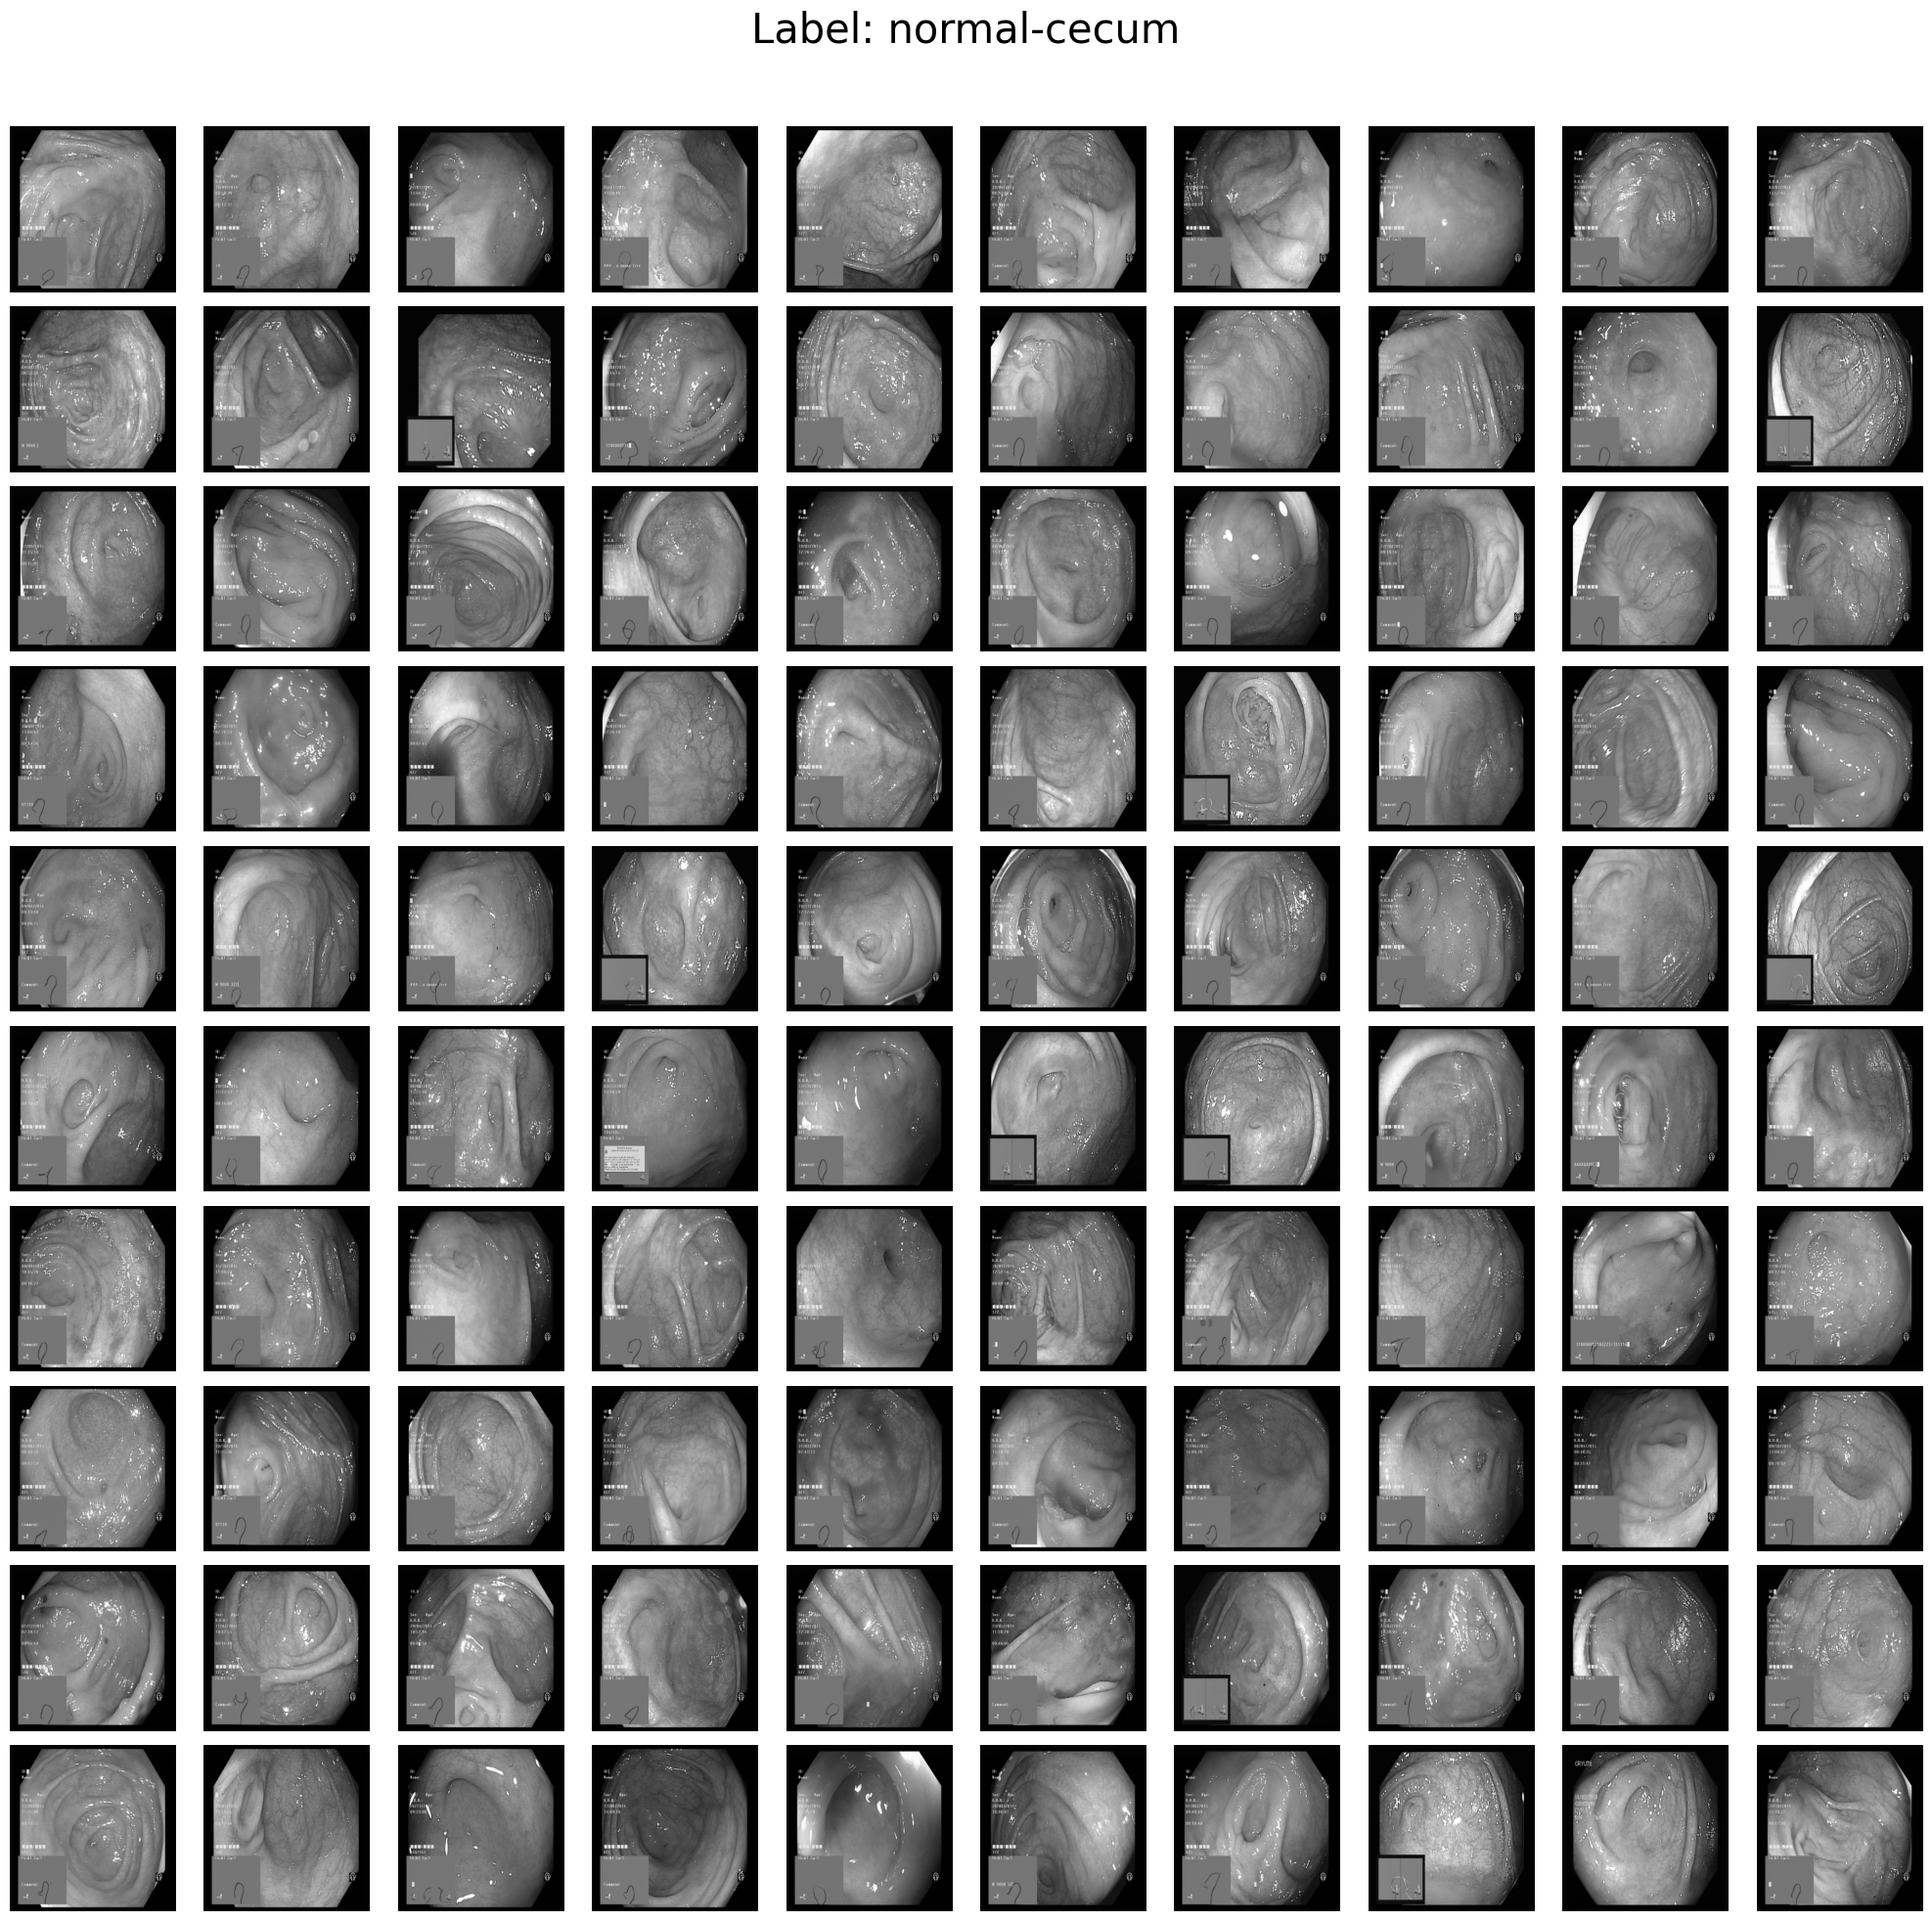

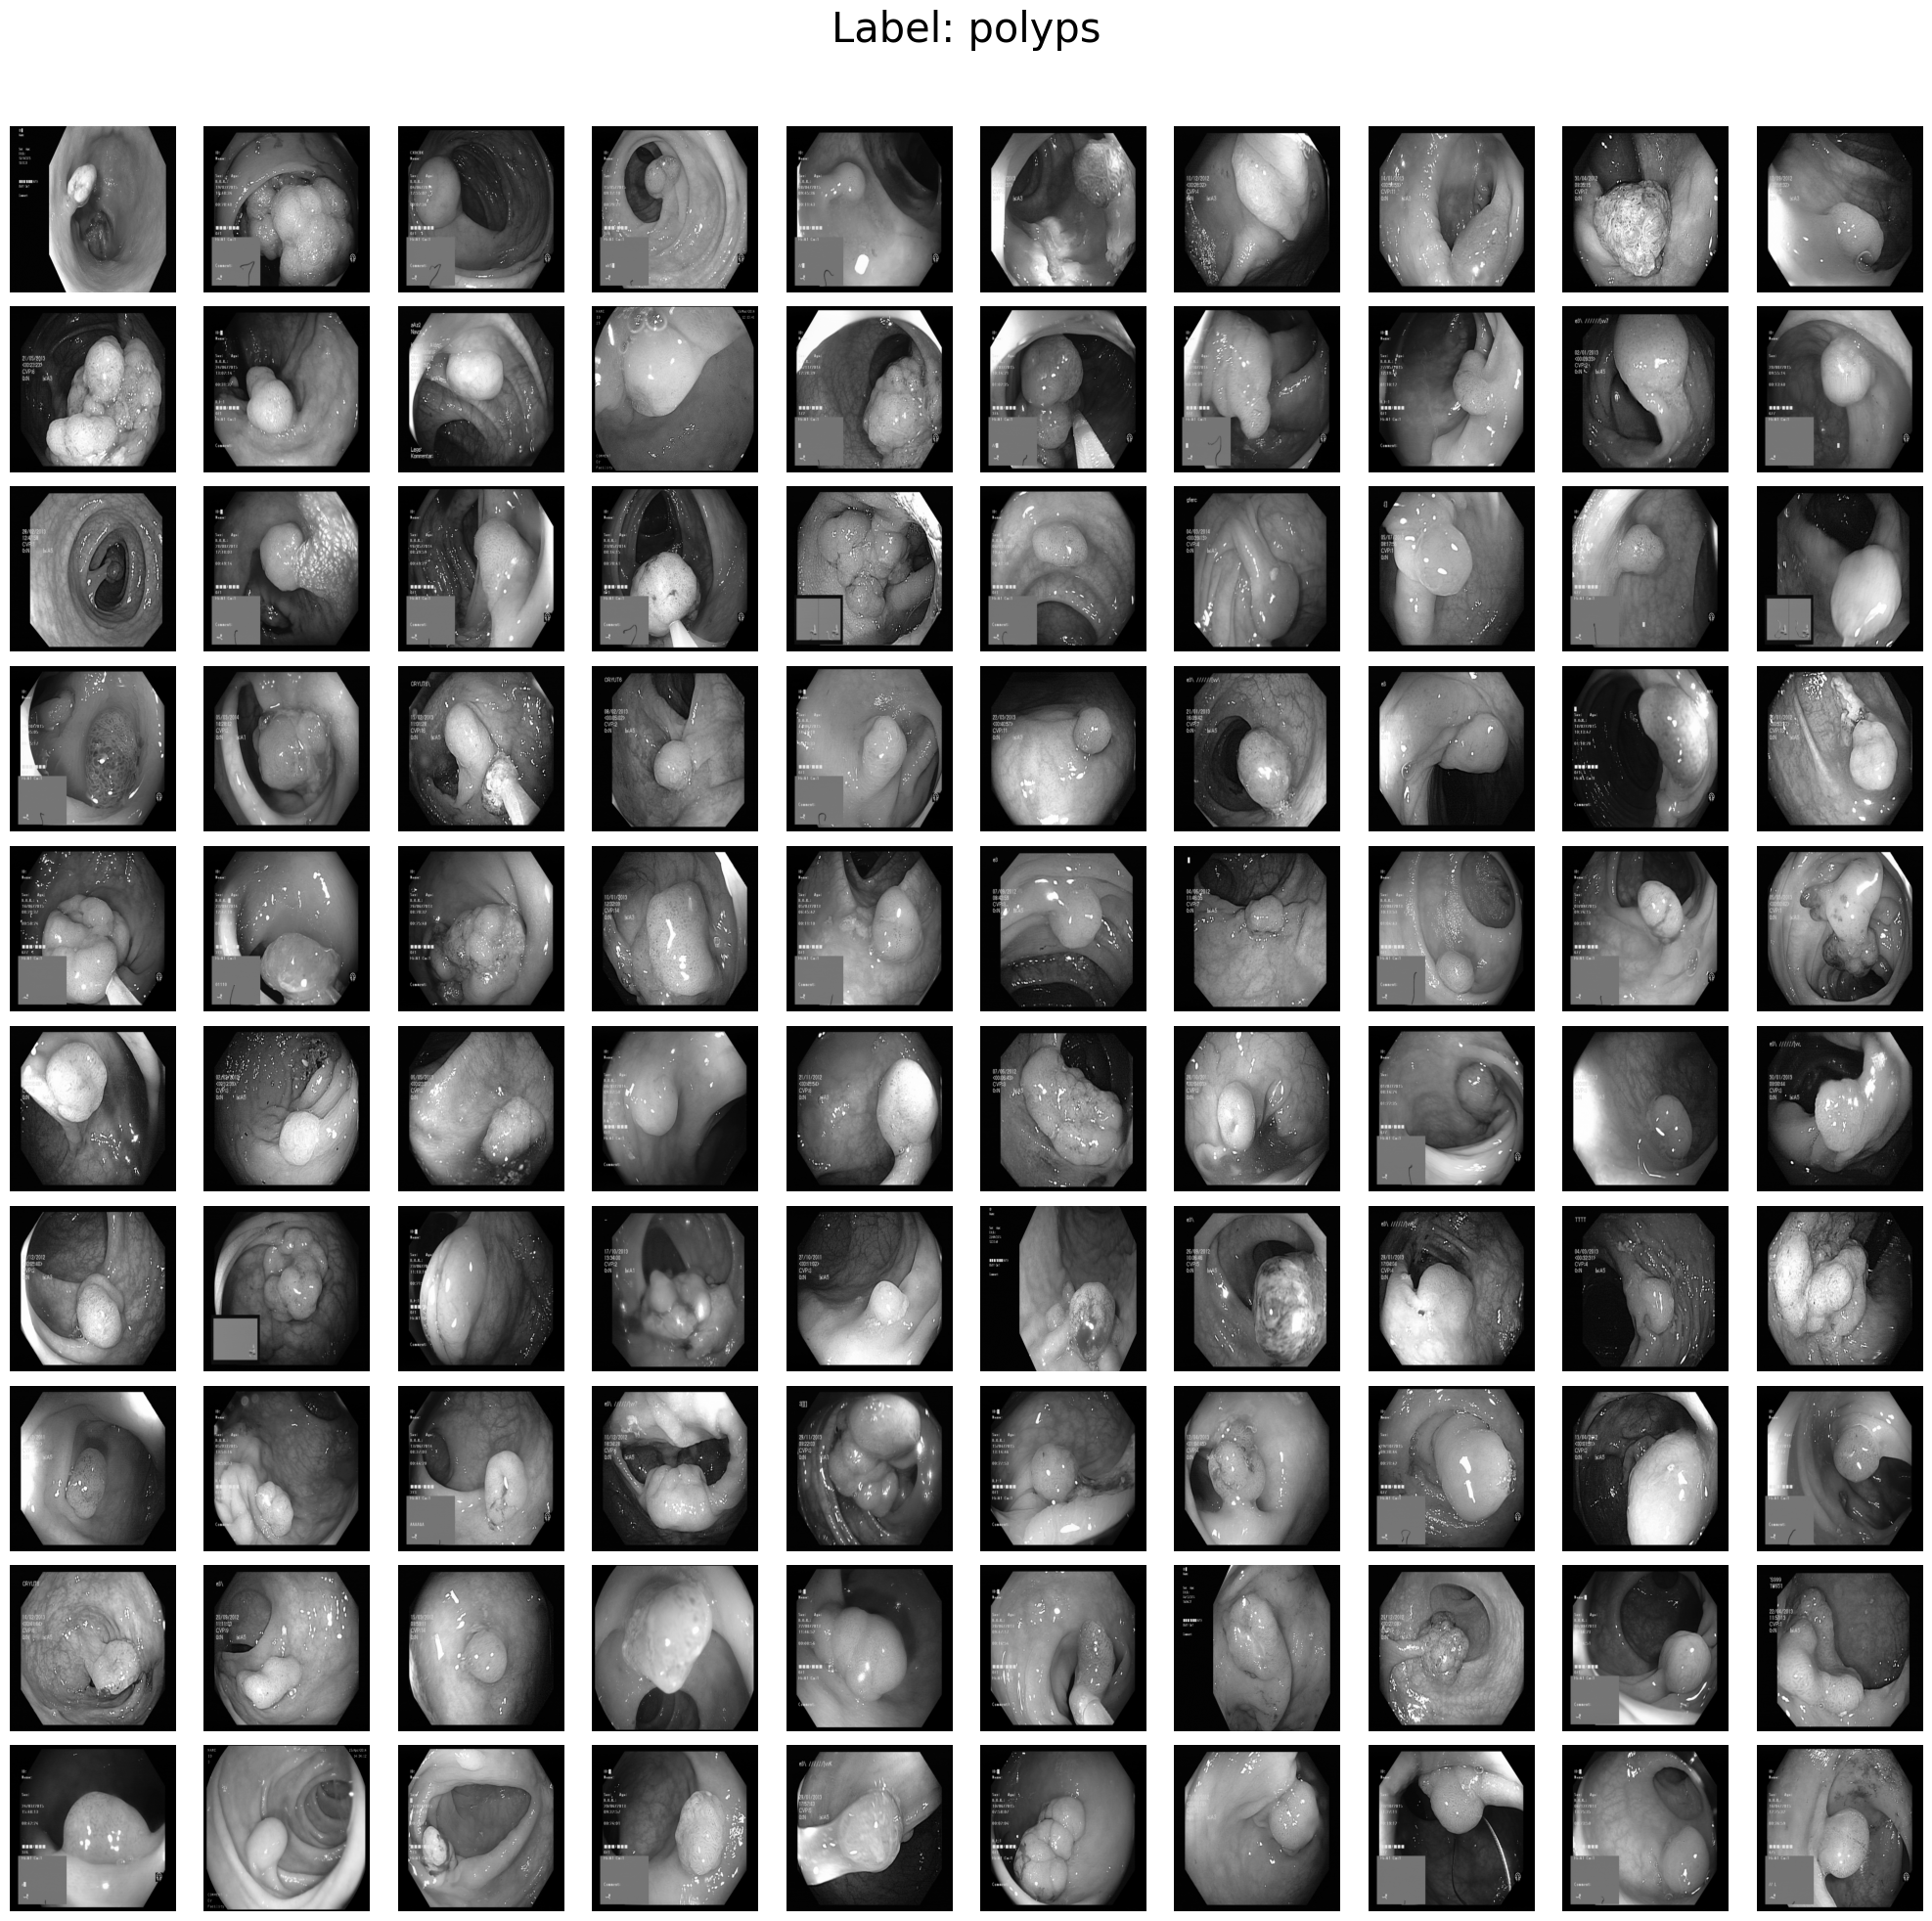

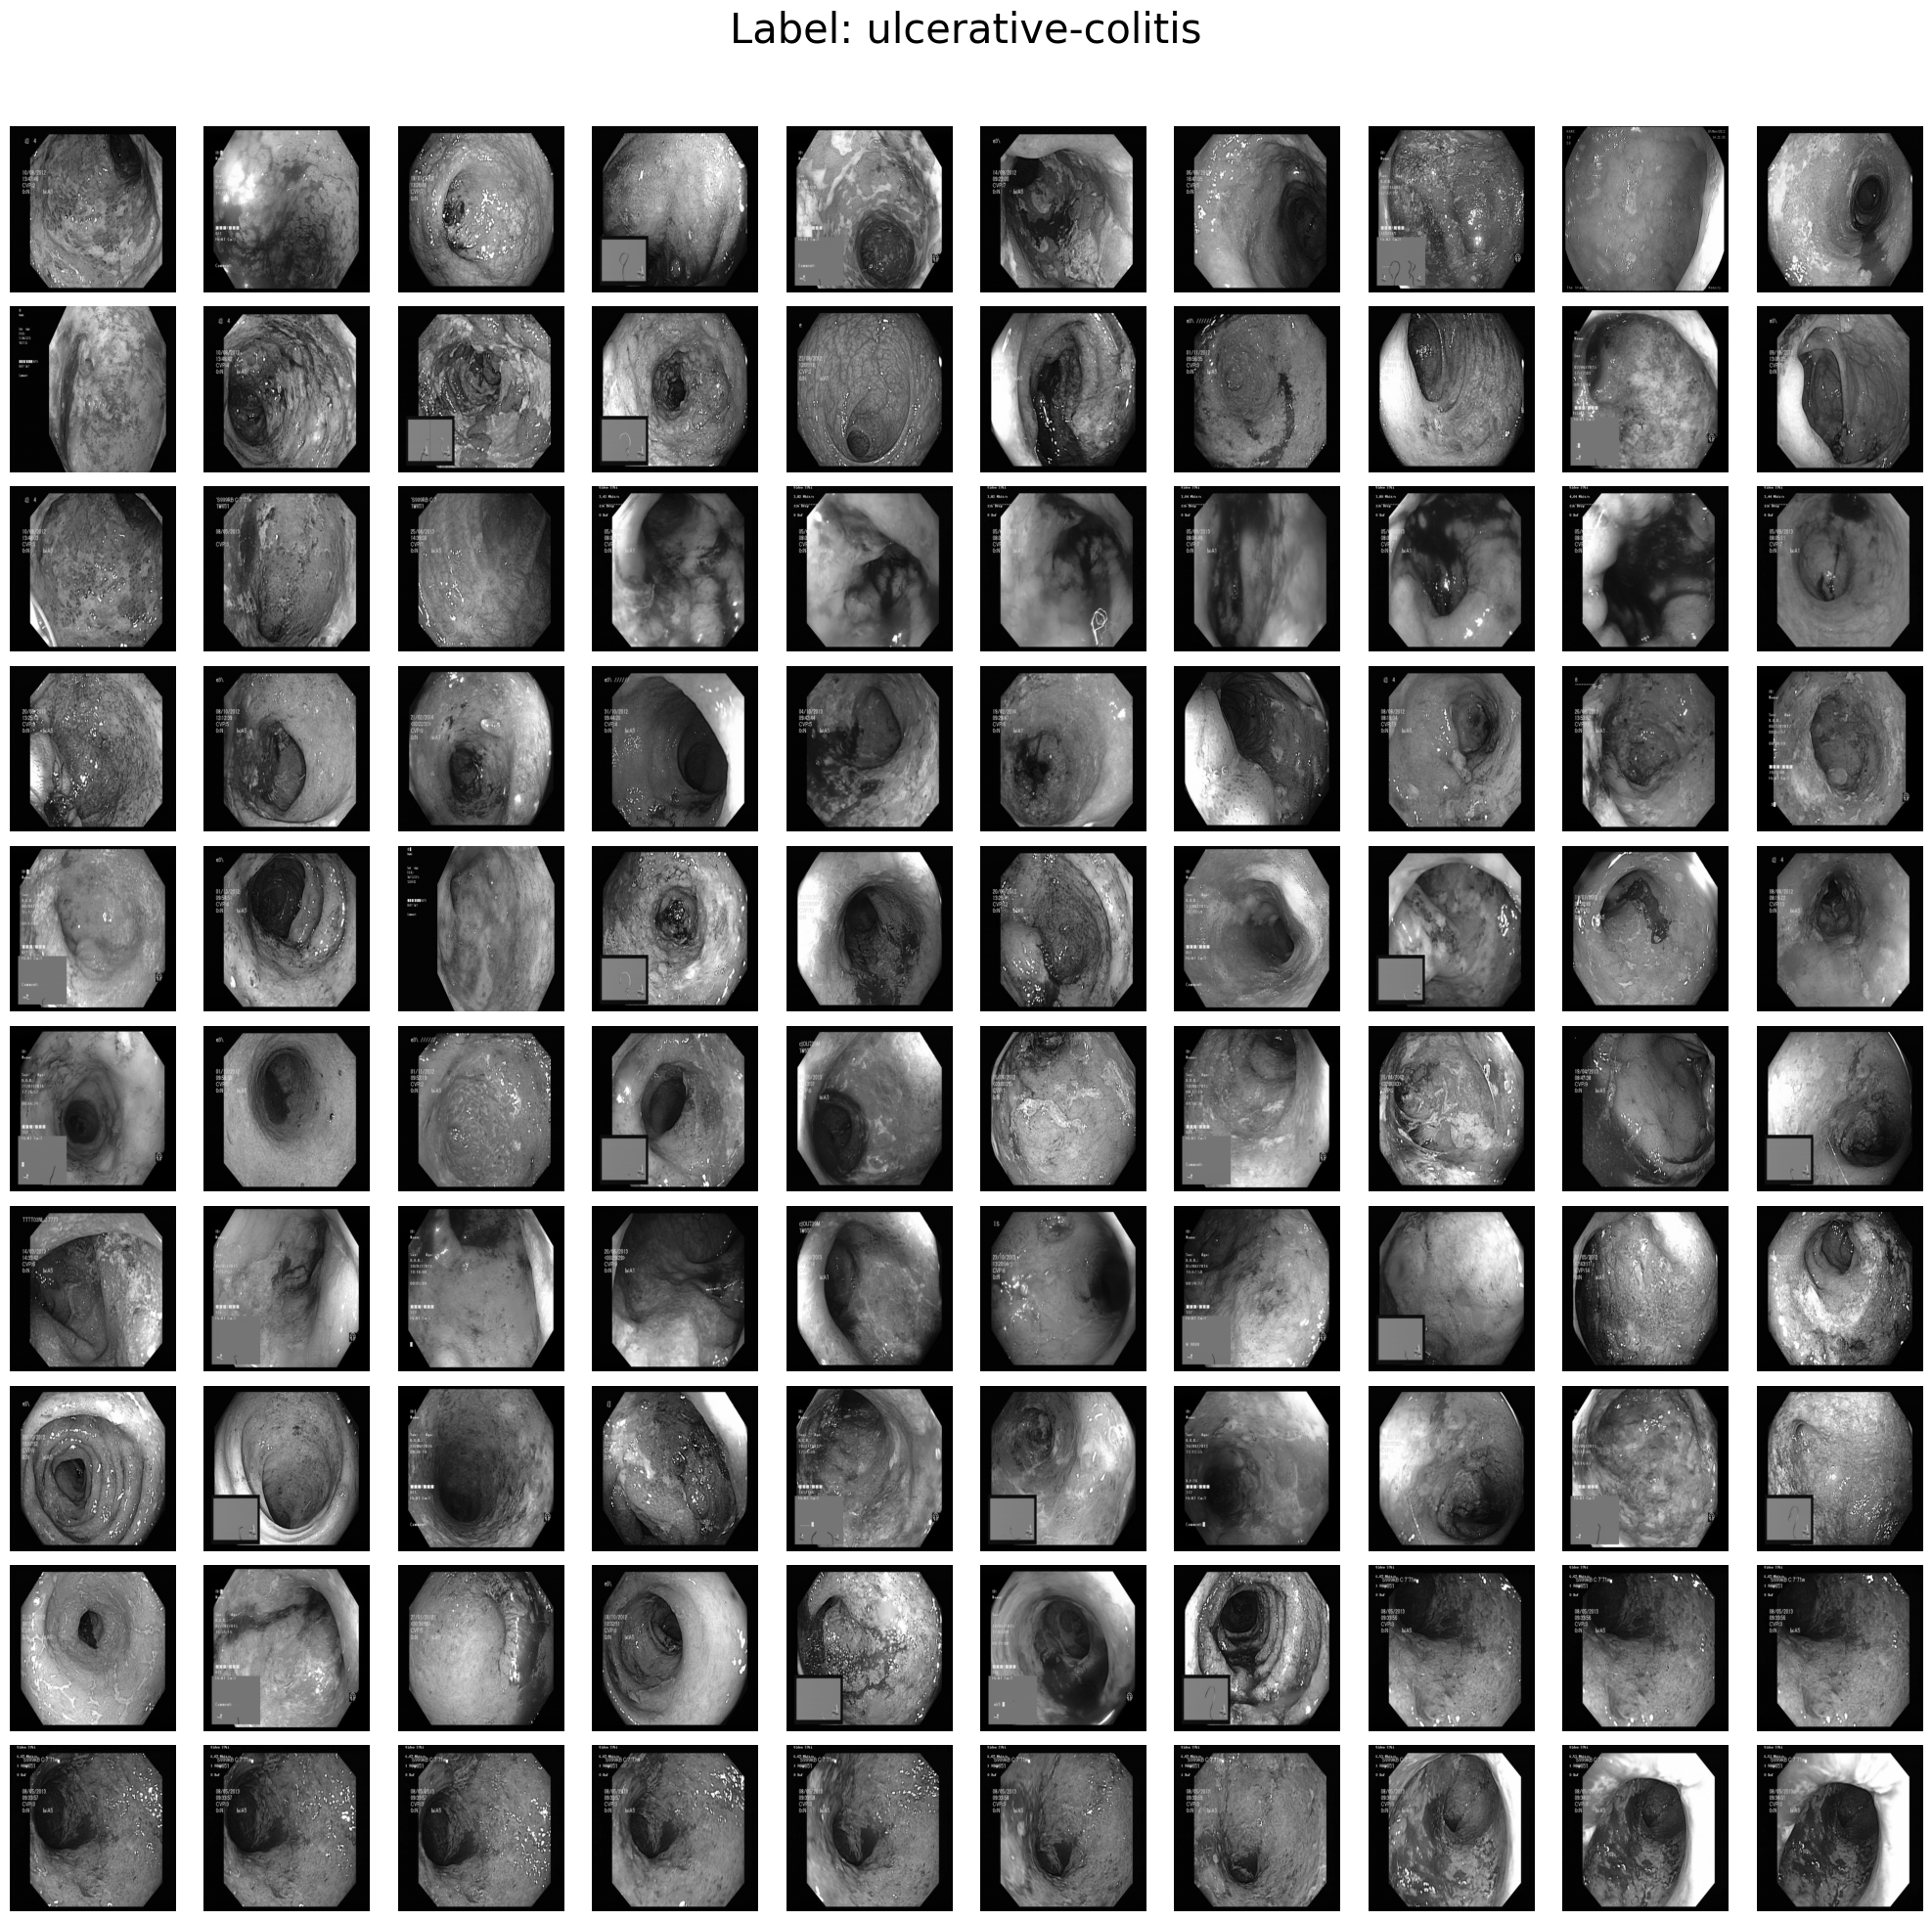

In [19]:
dataPreprocessed = [img for img in data] 
unique_labels = sorted(set(labels))

for label in unique_labels:
    # Ambil semua indeks gambar dari label ini
    idxs = [j for j, l in enumerate(labels) if l == label]
    
	
    # Buat grid 10x10 (cukup untuk 100 gambar, 10*10 = 100)
    fig, axs = plt.subplots(10, 10, figsize=(20, 20))
    fig.suptitle(f'Label: {label}', fontsize=30)
    
    for k in range(100):
        row = k // 10
        col = k % 10
        ax = axs[row][col]
        ax.imshow(dataPreprocessed[idxs[k]], cmap='gray')
        ax.axis('off')

    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()

In [20]:
def glcm(image, derajat):
    if derajat == 0:
        angles = [0]
    elif derajat == 45:
        angles = [np.pi / 4]
    elif derajat == 90:
        angles = [np.pi / 2]
    elif derajat == 135:
        angles = [3 * np.pi / 4]
    else:
        raise ValueError("Invalid angle. It should be one of the following: 0, 45, 90, 135.")
    
    # mengembalikan matrix glcm dari image
    glcm = graycomatrix(image, [1], angles, 256, symmetric=True, normed=True)
    return glcm

In [21]:
def correlation(matriks):
	return graycoprops(matriks, 'correlation')[0, 0]

def dissimilarity(matriks):
    return graycoprops(matriks, 'dissimilarity')[0, 0]

def homogenity(matriks):
    return graycoprops(matriks, 'homogeneity')[0, 0]

def contrast(matriks):
    return graycoprops(matriks, 'contrast')[0, 0]

def ASM(matriks):
    return graycoprops(matriks, 'ASM')[0, 0]

def energy(matriks):
    return graycoprops(matriks, 'energy')[0, 0]

def entropyGlcm(matriks):
    return entropy(matriks.ravel())

Derajat0 = []
Derajat45 = []
Derajat90 = []
Derajat135 = []
for i in range(len(img)):
    D0 = glcm(img[i], 0)
    D45 = glcm(img[i], 45)
    D90 = glcm(img[i], 90)
    D135 = glcm(img[i], 135)
    Derajat0.append(D0)
    Derajat45.append(D45)
    Derajat90.append(D90)
    Derajat135.append(D135)

def correlation(matriks):
	return graycoprops(matriks, 'correlation')[0, 0]

def dissimilarity(matriks):
    return graycoprops(matriks, 'dissimilarity')[0, 0]

def homogenity(matriks):
    return graycoprops(matriks, 'homogeneity')[0, 0]

def contrast(matriks):
    return graycoprops(matriks, 'contrast')[0, 0]

def ASM(matriks):
    return graycoprops(matriks, 'ASM')[0, 0]

def energy(matriks):
    return graycoprops(matriks, 'energy')[0, 0]

def entropyGlcm(matriks):
    return entropy(matriks.ravel())

Derajat0 = []
Derajat45 = []
Derajat90 = []
Derajat135 = []
for i in range(len(img)):
    D0 = glcm(img[i], 0)
    D45 = glcm(img[i], 45)
    D90 = glcm(img[i], 90)
    D135 = glcm(img[i], 135)
    Derajat0.append(D0)
    Derajat45.append(D45)
    Derajat90.append(D90)
    Derajat135.append(D135)

In [22]:
Kontras0, Kontras45, Kontras90, Kontras135 = [], [], [], []
dissimilarity0, dissimilarity45, dissimilarity90, dissimilarity135 =  [], [], [], []
homogenity0, homogenity45, homogenity90, homogenity135 = [], [], [], []
entropy0, entropy45, entropy90, entropy135 =  [], [], [], []
ASM0, ASM45, ASM90, ASM135 =  [], [], [], []
energy0, energy45, energy90, energy135 =  [], [], [], []
correlation0, correlation45, correlation90, correlation135 = [], [], [], []

In [23]:
for i in range(len(dataPreprocessed)):
    C0 = correlation(Derajat0[i])
    correlation0.append(C0)
    C45 = correlation(Derajat45[i])
    correlation45.append(C45)
    C90 = correlation(Derajat90[i])
    correlation90.append(C90)
    C135 = correlation(Derajat135[i])
    correlation135.append(C135)

In [24]:
for i in range(len(data)):
    K0 = contrast(Derajat0[i])
    K45 = contrast(Derajat45[i])
    K90 = contrast(Derajat90[i])
    K135 = contrast(Derajat135[i])
    Kontras0.append(K0)
    Kontras45.append(K45)
    Kontras90.append(K90)
    Kontras135.append(K135)

In [25]:
for i in range(len(data)):
    Dis0 = dissimilarity(Derajat0[i])
    Dis45 = dissimilarity(Derajat45[i])
    Dis90 = dissimilarity(Derajat90[i])
    Dis135 = dissimilarity(Derajat135[i])
    dissimilarity0.append(Dis0)
    dissimilarity45.append(Dis45)
    dissimilarity90.append(Dis90)
    dissimilarity135.append(Dis135)

In [26]:
for i in range(len(data)):
    H0 = homogenity(Derajat0[i])
    H45 = homogenity(Derajat45[i])
    H90 = homogenity(Derajat90[i])
    H135 = homogenity(Derajat135[i])
    homogenity0.append(H0)
    homogenity45.append(H45)
    homogenity90.append(H90)
    homogenity135.append(H135)

In [27]:
for i in range(len(data)):  
    E0 = entropyGlcm(Derajat0[i])
    E45 = entropyGlcm(Derajat45[i])
    E90 = entropyGlcm(Derajat90[i])
    E135 = entropyGlcm(Derajat135[i])
    entropy0.append(E0)
    entropy45.append(E45)
    entropy90.append(E90)
    entropy135.append(E135)

In [28]:
for i in range(len(data)):
    A0 = ASM(Derajat0[i])
    A45 = ASM(Derajat45[i])
    A90 = ASM(Derajat90[i])
    A135 = ASM(Derajat135[i])
    ASM0.append(A0)
    ASM45.append(A45)
    ASM90.append(A90)
    ASM135.append(A135)

In [29]:
for i in range(len(data)):
    ER0 = energy(Derajat0[i])
    ER45 = energy(Derajat45[i])
    ER90 = energy(Derajat90[i])
    ER135 = energy(Derajat135[i])
    energy0.append(ER0)
    energy45.append(ER45)
    energy90.append(ER90)
    energy135.append(ER135)

In [30]:
print("Panjang masing-masing kolom:")
print(f"Filename: {len(file_name)}")
print(f"Label: {len(labels)}")
print(f"Contrast0: {len(Kontras0)}")
print(f"Homogeneity0: {len(homogenity0)}")
print(f"Energy0: {len(energy0)}")
print(f"Correlation0: {len(correlation0)}")
# Lanjutkan untuk kolom lainnya...

Panjang masing-masing kolom:
Filename: 300
Label: 300
Contrast0: 300
Homogeneity0: 300
Energy0: 300
Correlation0: 300


In [32]:
dataTable = {'Filename': file_name, 'Label': labels,
        'Contrast0': Kontras0, 'Contrast45': Kontras45, 'Contrast90': Kontras90, 'Contrast135': Kontras135,
        'Homogeneity0': homogenity0, 'Homogeneity45': homogenity45, 'Homogeneity90': homogenity90, 'Homogeneity135': homogenity135,
        'Dissimilarity0': dissimilarity0, 'Dissimilarity45': dissimilarity45, 'Dissimilarity90': dissimilarity90, 'Dissimilarity135': dissimilarity135,
        'Entropy0': entropy0, 'Entropy45': entropy45, 'Entropy90': entropy90, 'Entropy135': entropy135,
        'ASM0': ASM0, 'ASM45': ASM45, 'ASM90': ASM90, 'ASM135': ASM135,
        'Energy0': energy0, 'Energy45': energy45, 'Energy90': energy90, 'Energy135': energy135,
        'Correlation0': correlation0, 'Correlation45': correlation45, 'Correlation90': correlation90, 'Correlation135': correlation135,
        }
df = pd.DataFrame(dataTable)
df.to_csv('hasil_ekstraksi_1.csv', index=False)

hasilEkstrak = pd.read_csv('hasil_ekstraksi_1.csv')
hasilEkstrak

Filename               Label  \
0             00f3d2cc-93ea-40f0-9b88-b159b07a49cb.jpg        normal-cecum   
1             01c49663-9674-44ae-b61e-05243a30e4ab.jpg        normal-cecum   
2             01e023db-5c76-4c28-91ab-06e36cd31495.jpg        normal-cecum   
3             02dcedf1-c0bd-4ef4-b072-ea8f11da6a1d.jpg        normal-cecum   
4             032a3076-c75c-4089-a57c-1b19e5f6589e.jpg        normal-cecum   
..                                                 ...                 ...   
295  fc79c489-b358-4368-b965-330615af73d4_00000332.jpg  ulcerative-colitis   
296  fc79c489-b358-4368-b965-330615af73d4_00000351.jpg  ulcerative-colitis   
297  fc79c489-b358-4368-b965-330615af73d4_00000403.jpg  ulcerative-colitis   
298  fc79c489-b358-4368-b965-330615af73d4_00000411.jpg  ulcerative-colitis   
299  fc79c489-b358-4368-b965-330615af73d4_00000413.jpg  ulcerative-colitis   

       Contrast0   Contrast45   Contrast90  Contrast135  Homogeneity0  \
0       0.150000     2.390125     2.253593     2.378303      0.977051   
1       0.150000     2.078581     1.942049     2.066759      0.977051   
2       0.150000     2.807371     2.670839     2.795549      0.977051   
3       0.150000  1358.707232  1358.570700  1358.695410      0.977051   
4       0.150000  1495.285814  1495.149281  1495.273992      0.977051   
..           ...          ...          ...          ...           ...   
295  3007.716667  3141.616134    98.825220  3063.830320      0.261481   
296  2997.834028  3133.246871    99.496523  3054.002086      0.259400   
297  2999.917361  3140.531989   102.623088  3056.945063      0.256960   
298  3007.284722  3149.657858   103.136764  3063.909597      0.248285   
299  2978.588889  3121.714882   104.382012  3035.956885      0.253660   

     Homogeneity45  Homogeneity90  Homogeneity135  ...     ASM90    ASM135  \
0         0.898011       0.915813        0.897246  ...  0.770487  0.755938   
1         0.904635       0.922436        0.903870  ...  0.765732  0.751209   
2         0.892144       0.909945        0.891379  ...  0.760717  0.746301   
3         0.894642       0.912443        0.893877  ...  0.765569  0.751113   
4         0.889755       0.907557        0.888990  ...  0.763123  0.748655   
..             ...            ...             ...  ...       ...       ...   
295       0.257042       0.501763        0.262267  ...  0.022487  0.015563   
296       0.255943       0.497984        0.260348  ...  0.022512  0.016963   
297       0.256182       0.500388        0.258633  ...  0.022861  0.016918   
298       0.246207       0.494560        0.246156  ...  0.020251  0.014695   
299       0.253139       0.497539        0.250644  ...  0.021138  0.014665   

      Energy0  Energy45  Energy90  Energy135  Correlation0  Correlation45  \
0    0.885152  0.870130  0.877774   0.869447      0.931615      -0.092571   
1    0.879814  0.867408  0.875061   0.866723      0.918215      -0.137207   
2    0.878247  0.864571  0.872191   0.863887      0.940179      -0.122028   
3    0.879615  0.867349  0.874968   0.866668      0.999966       0.692964   
4    0.879527  0.865930  0.873569   0.865248      0.999950       0.499550   
..        ...       ...       ...        ...           ...            ...   
295  0.129105  0.123594  0.149955   0.124753      0.811657       0.803374   
296  0.133987  0.129742  0.150041   0.130241      0.811328       0.802906   
297  0.133701  0.129568  0.151199   0.130069      0.811205       0.802456   
298  0.125518  0.120431  0.142308   0.121224      0.810303       0.801422   
299  0.125681  0.120613  0.145388   0.121100      0.812171       0.803244   

     Correlation90  Correlation135  
0        -0.019714       -0.089578  
1        -0.049858       -0.133733  
2        -0.057961       -0.119470  
3         0.693022        0.692966  
4         0.499641        0.499552  
..             ...             ...  
295       0.993990        0.808243  
296       0.993918        0.807891  
297       0.993729        0.807714  


<Axes: >

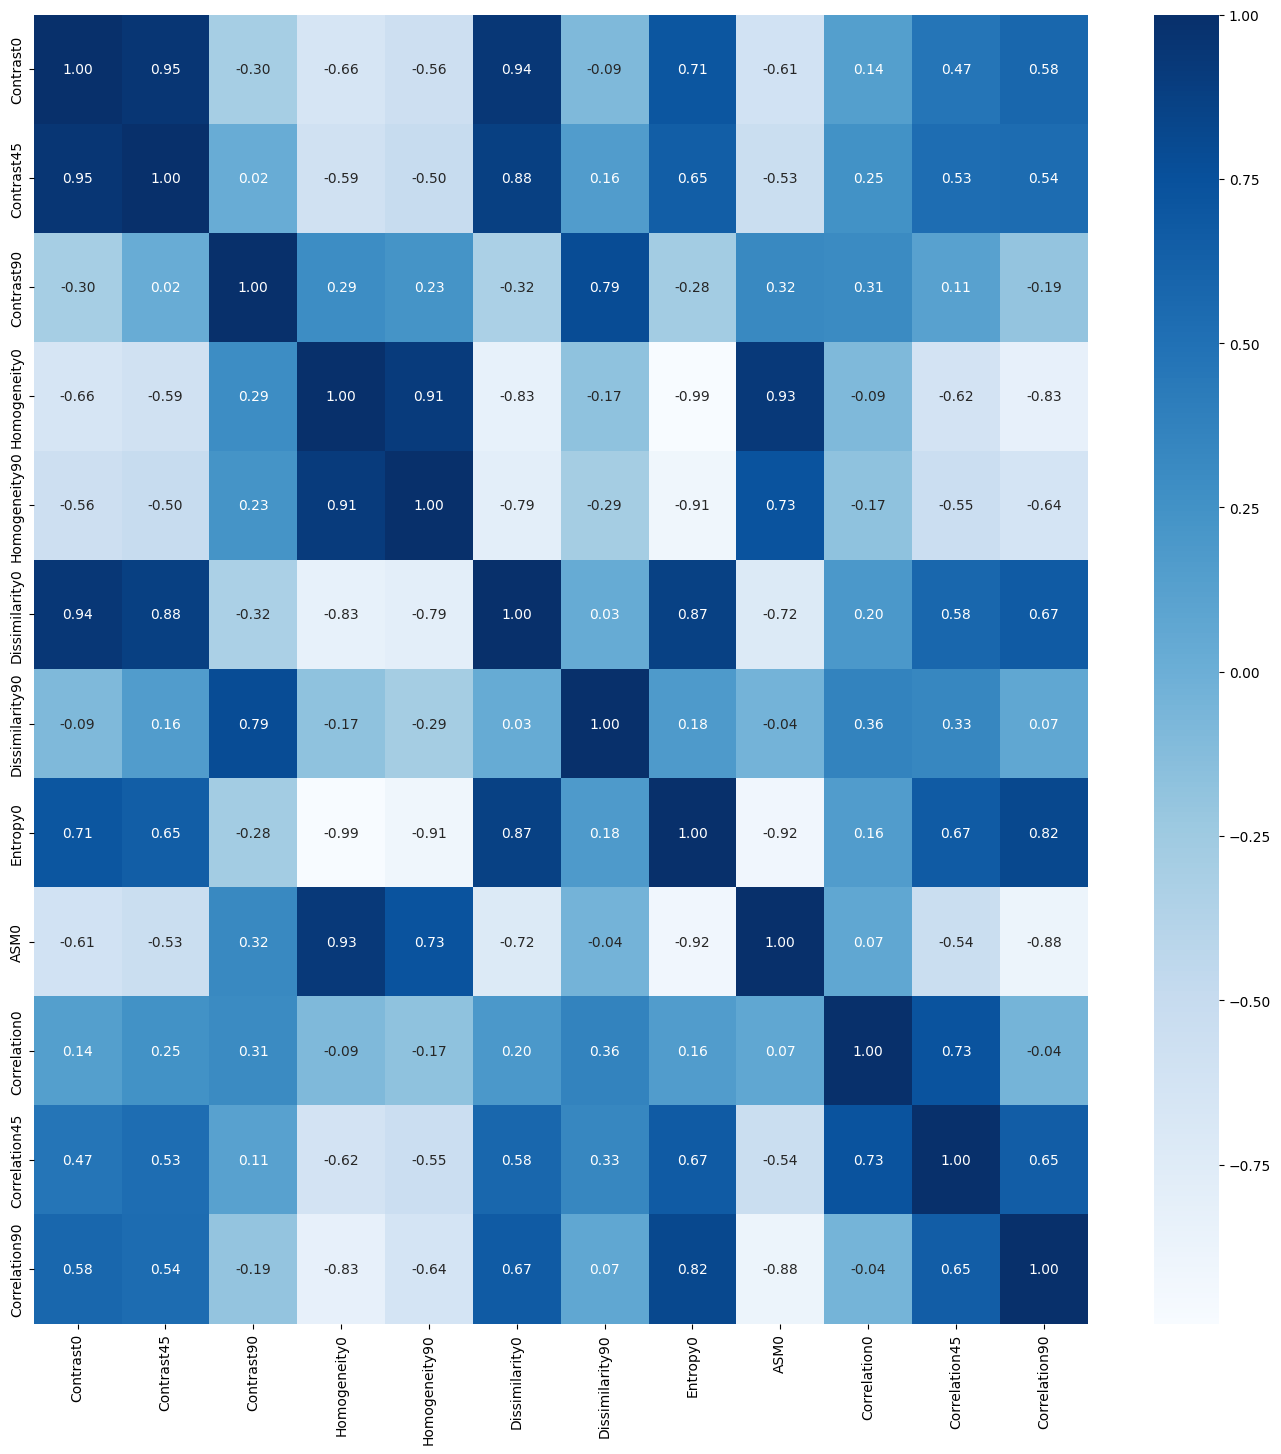

In [33]:
# Menghitung korelasi
correlation = hasilEkstrak.drop(columns=['Label','Filename']).corr()

# Menyaring fitur yang memiliki korelasi absolut lebih dari 0.95 dengan label
threshold = 0.95 # atur threshold ini untuk menentukan seberapa besar korelasi yang ingin disaring
selectionFeature = []
columns = np.full((correlation.shape[0],), True, dtype=bool)
for i in range(correlation.shape[0]):
	for j in range(i+1, correlation.shape[0]):
		if correlation.iloc[i,j] >= threshold:
			if columns[j]:
				columns[j] = False
select = hasilEkstrak.drop(columns=['Label','Filename']).columns[columns]
x_new = hasilEkstrak[select]
x_new
y = hasilEkstrak['Label']
plt.figure(figsize=(17,17))
sns.heatmap(x_new.corr(), annot=True, cmap='Blues', fmt=".2f")

In [34]:
# ubah bagian test_size sesuai kebutuhan
# 0.3 = 30% data untuk testing (train/test 70/30)
# 0.2 = 20% data untuk testing (train/test 80/20)
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(240, 12)
(60, 12)


In [35]:
# normalisasi mean std
X_test = (X_test - X_train.mean()) / X_train.std()
X_train = (X_train - X_train.mean()) / X_train.std()

In [36]:
def generateClassificationReport(y_true, y_pred):
	print(classification_report(y_true, y_pred))
	print(confusion_matrix(y_true, y_pred))
	print('Accuracy:', accuracy_score(y_true, y_pred))

# Define classifiers
rf = RandomForestClassifier(n_estimators=5, random_state=42)
svm = SVC(kernel='rbf', random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

In [37]:
# Train Random Forest Classifier
rf.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("------Training Set------")
y_pred = rf.predict(X_train)
generateClassificationReport( y_train, y_pred)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred = rf.predict(X_test)
generateClassificationReport( y_test, y_pred)

------Training Set------
                    precision    recall  f1-score   support

      normal-cecum       1.00      0.99      0.99        78
            polyps       0.99      0.99      0.99        84
ulcerative-colitis       0.99      1.00      0.99        78

          accuracy                           0.99       240
         macro avg       0.99      0.99      0.99       240
      weighted avg       0.99      0.99      0.99       240

[[77  1  0]
 [ 0 83  1]
 [ 0  0 78]]
Accuracy: 0.9916666666666667

------Testing Set------
                    precision    recall  f1-score   support

      normal-cecum       1.00      1.00      1.00        22
            polyps       1.00      1.00      1.00        16
ulcerative-colitis       1.00      1.00      1.00        22

          accuracy                           1.00        60
         macro avg       1.00      1.00      1.00        60
      weighted avg       1.00      1.00      1.00        60

[[22  0  0]
 [ 0 16  0]
 [ 0  0 22]]
A

In [38]:
# Train SVM Classifier
svm.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("\n------Training Set------")
y_pred = svm.predict(X_train)
generateClassificationReport( y_train, y_pred)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred = svm.predict(X_test)
generateClassificationReport( y_test, y_pred)


------Training Set------
                    precision    recall  f1-score   support

      normal-cecum       1.00      0.99      0.99        78
            polyps       0.90      0.98      0.94        84
ulcerative-colitis       0.97      0.90      0.93        78

          accuracy                           0.95       240
         macro avg       0.96      0.95      0.95       240
      weighted avg       0.96      0.95      0.95       240

[[77  1  0]
 [ 0 82  2]
 [ 0  8 70]]
Accuracy: 0.9541666666666667

------Testing Set------
                    precision    recall  f1-score   support

      normal-cecum       1.00      1.00      1.00        22
            polyps       0.83      0.94      0.88        16
ulcerative-colitis       0.95      0.86      0.90        22

          accuracy                           0.93        60
         macro avg       0.93      0.93      0.93        60
      weighted avg       0.94      0.93      0.93        60

[[22  0  0]
 [ 0 15  1]
 [ 0  3 19]]


In [39]:
# Train KNN Classifier
knn.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("\n------Training Set------")
y_pred = knn.predict(X_train)
generateClassificationReport( y_train, y_pred)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred = knn.predict(X_test)
generateClassificationReport( y_test, y_pred)


------Training Set------
                    precision    recall  f1-score   support

      normal-cecum       1.00      1.00      1.00        78
            polyps       1.00      0.95      0.98        84
ulcerative-colitis       0.95      1.00      0.97        78

          accuracy                           0.98       240
         macro avg       0.98      0.98      0.98       240
      weighted avg       0.98      0.98      0.98       240

[[78  0  0]
 [ 0 80  4]
 [ 0  0 78]]
Accuracy: 0.9833333333333333

------Testing Set------
                    precision    recall  f1-score   support

      normal-cecum       1.00      1.00      1.00        22
            polyps       1.00      0.88      0.93        16
ulcerative-colitis       0.92      1.00      0.96        22

          accuracy                           0.97        60
         macro avg       0.97      0.96      0.96        60
      weighted avg       0.97      0.97      0.97        60

[[22  0  0]
 [ 0 14  2]
 [ 0  0 22]]


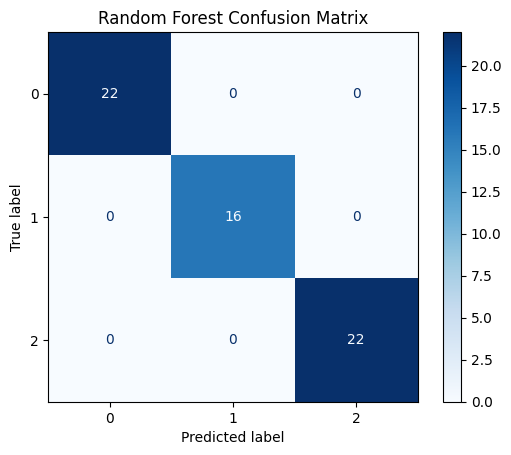

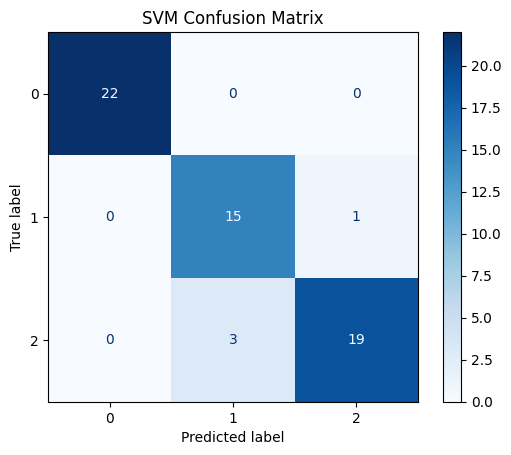

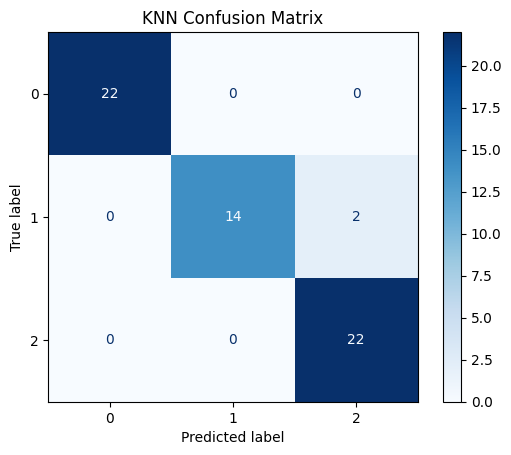

In [40]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Plot confusion matrix for Random Forest
plot_confusion_matrix(y_test, rf.predict(X_test), "Random Forest Confusion Matrix")
# Plot confusion matrix for SVM
plot_confusion_matrix(y_test, svm.predict(X_test), "SVM Confusion Matrix")
# Plot confusion matrix for KNN
plot_confusion_matrix(y_test, knn.predict(X_test), "KNN Confusion Matrix")